In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
dataPath = r'D:\books\4th year 2nd sem books\bs project\dataset\data\dataset'

In [3]:
def loadDataSet(dataPath):
    data = []
    imageSize = 28
    for cat in os.listdir(dataPath):
        label = int(cat[:2])
        for i in os.listdir(dataPath+'/'+cat):
            imagePath = dataPath+'/'+cat+'/'+i
            try:
                image = cv2.imread(imagePath,0) 
                image = cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    
    X = [] #image
    Y = [] #labels
    for img,l in data: 
        X.append(img)
        Y.append(l)
    X = np.array(X)
    Y = np.array(Y).reshape(len(Y),1)
    return X,Y

In [4]:
#Load Data Set 
images,labels=loadDataSet(dataPath)

In [5]:
print(labels)

[[6]
 [4]
 [4]
 ...
 [1]
 [9]
 [7]]


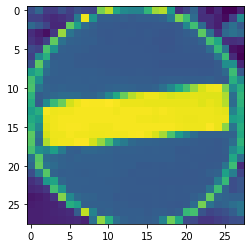

[6]


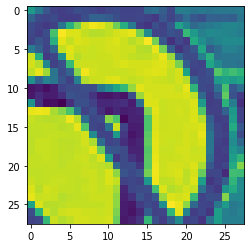

[4]


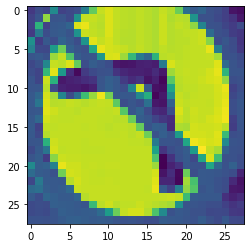

[4]


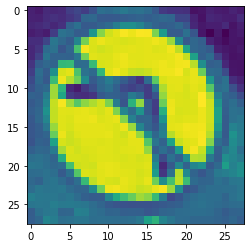

[4]


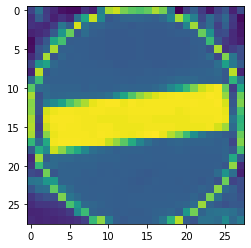

[6]


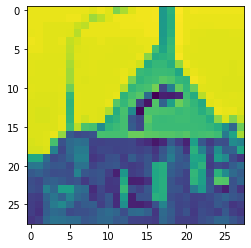

[3]


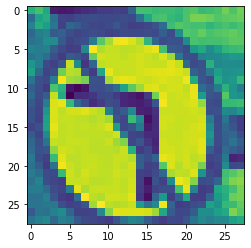

[4]


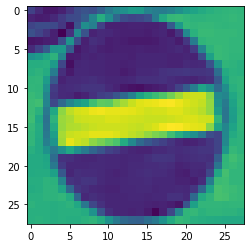

[6]


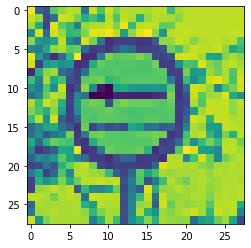

[11]


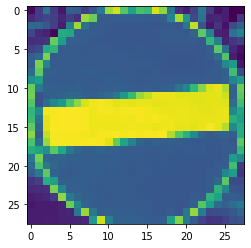

[6]


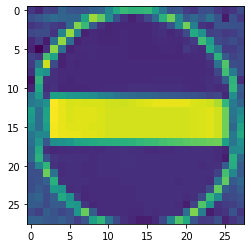

[6]


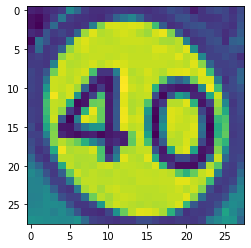

[7]


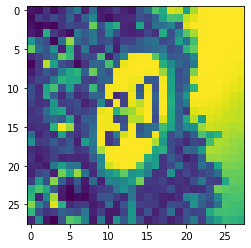

[8]


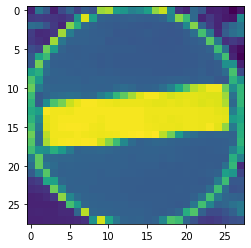

[6]


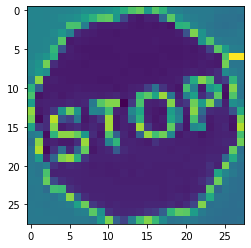

[1]


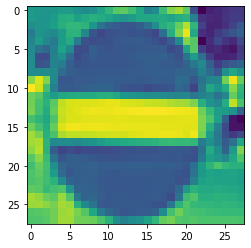

[6]


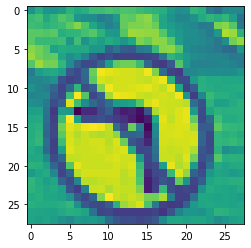

[4]


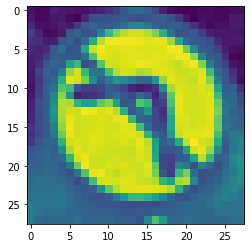

[4]


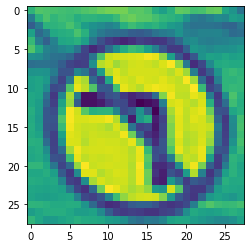

[4]


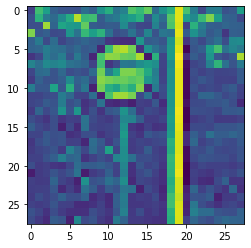

[11]


In [6]:
#plot some examples from our images
for i in range(20):
    plt.imshow(images[i])
    plt.show()
    print(labels[i])

In [7]:
#Compute the mean and Standard Deviation , becouse we need it Later in Normalize the images 
mu=np.mean(images)
std=np.std(images)
print("The Mean=",mu)
print("The Standard Deviation=",std)

The Mean= 115.80955687337566
The Standard Deviation= 57.61342475946501


In [8]:
images.shape

(1916, 28, 28)

In [9]:
m=images.shape[0] # 3D Array (number of training images,)
imageShape=images.shape[1:]
imageShape

(28, 28)

In [174]:
#Splitting Data into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.30,random_state=42)
print("the Number of Training Example=",x_train.shape[0])
print("the Number of Testing Example=",x_test.shape[0])

the Number of Training Example= 1341
the Number of Testing Example= 575


In [187]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1341, 28, 28)
(575, 28, 28)
(1341, 1)
(575, 1)


In [175]:
def preprocessingImage(image=None,imageSize=28,mu=115.80955687337566,std=57.61342475946501):
    try:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    except:
        pass
    image = cv2.resize(image,(imageSize,imageSize))
    image = (image - mu) / std
    image = image.reshape(1,imageSize,imageSize,1)
    return image

In [176]:
import tensorflow as tf
from tensorflow import keras

In [177]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=8,kernel_size=(2,2),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Flatten()
])
model.add(keras.layers.Dense(64, activation='swish'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(13, activation='sigmoid'))
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
            
              metrics = ['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 27, 27, 8)         40        
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 9, 9, 8)          0         
 g2D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 648)               0         
                                                                 
 dense_92 (Dense)            (None, 64)                41536     
                                                                 
 dense_93 (Dense)            (None, 32)                2080      
                                                                 
 dense_94 (Dense)            (None, 13)                429       
                                                     

In [178]:
#Fitting 
Model=model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 10)

Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: 8.6097 - accuracy: 0.2983 - val_loss: 1.9109 - val_accuracy: 0.4435
Epoch 2/10
42/42 [==============================] - 0s 5ms/step - loss: 1.5248 - accuracy: 0.5332 - val_loss: 1.2916 - val_accuracy: 0.5948
Epoch 3/10
42/42 [==============================] - 0s 6ms/step - loss: 1.1819 - accuracy: 0.6525 - val_loss: 1.1246 - val_accuracy: 0.6522
Epoch 4/10
42/42 [==============================] - 0s 5ms/step - loss: 0.9854 - accuracy: 0.6868 - val_loss: 0.9570 - val_accuracy: 0.6887
Epoch 5/10
42/42 [==============================] - 0s 5ms/step - loss: 0.8763 - accuracy: 0.7114 - val_loss: 0.9261 - val_accuracy: 0.7130
Epoch 6/10
42/42 [==============================] - 0s 6ms/step - loss: 0.7807 - accuracy: 0.7368 - val_loss: 0.7860 - val_accuracy: 0.7530
Epoch 7/10
42/42 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.7897 - val_loss: 0.8080 - val_accuracy: 0.7670
Epoch 8/10
42/42 [==

In [179]:
model.evaluate(x_test,
               y_test,
               verbose = 0)

[0.5693758726119995, 0.852173924446106]

In [180]:
model.save('Models/TSModel5')

INFO:tensorflow:Assets written to: Models/TSModel5\assets


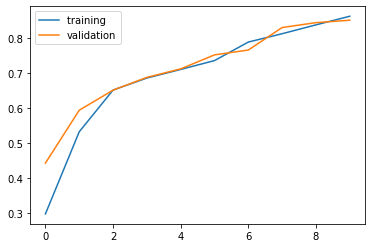

In [181]:
plt.figure(0)
plt.plot(Model.history['accuracy'], label='training ')
plt.plot(Model.history['val_accuracy'], label='validation')
plt.legend()

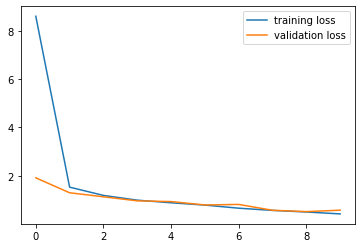

In [182]:
plt.plot(Model.history['loss'],label='training loss')
plt.plot(Model.history['val_loss'], label='validation loss')
plt.legend()

[I 2022-04-19 19:33:18,294] A new study created in memory with name: no-name-363b7e3a-7361-4a69-bfee-b342c63bf544
